# Project description

This project aims to train an agent to navigate in an environment filled of bananas collecting the yellow ones while trying to avoid the blue ones. The goal is achieve by using Deep Reinforcement Learning and a [Deep Q-Network](http://files.davidqiu.com//research/nature14236.pdf). Multiple sized of networks were used to train and comapare below. The input layer of all of the models has the same size of the state space and the ouput layer has the size of the actions space. All of them have 2 hidden layers with sizes described by `model_name` below:

- dqn_32: 64x32
- dqn_64: 64x64
- dqn_128: 128x64

These models were trained using a `UniformReplayBuffer` of size `BUFFER_SIZE`. This buffer selects memories randomly uniform from its memory every `UPDATE_EVERY` episodes.

The global parameters for the training are specified in the file agent.py and copied here for simplicity.

```
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [2]:
def moving_average(data, size):
    return np.convolve(data, np.ones(size), mode='valid') / size

dqn_32 reached goal on episode 259
dqn_64 reached goal on episode 262
dqn_128 reached goal on episode 383


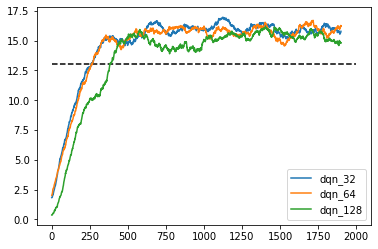

In [3]:
models = ['dqn_32', 'dqn_64', 'dqn_128']

plot_size = 2000

for model_name in models:
    scores_file_path = os.path.join('checkpoints', f'score_{model_name}.pkl')
    scores = pickle.load(open(scores_file_path, 'rb'))[:plot_size]
    averaged = moving_average(scores, 100)
    
    goal_index = np.where(averaged > 13)[0]
    if goal_index.any():
        print(f'{model_name} reached goal on episode {goal_index[0] + 1}')
    else:
        print(f'{model_name} did not reach the goal')
    
    plt.plot(range(len(averaged)), averaged, label=model_name)

plt.hlines(13, 0, plot_size, color='black', linestyles='dashed')
plt.legend()
plt.show()

Above you can see the moving average of all the models. The dashed line on the image marks the goal, which is an average of 13 over 100 consecutive episodes. 

The models `dqn_32` and `dqn_64` achieved the goal in around 250 episodes while the model `dqn_128` achieve the goal in almost 400 episod

# Future Work

The implementations of the ProportionalReplayBuffer and RankBasedReplayBuffer are not converging. After some investigation I found that they problem is possibly related to the Importance Sampling (IS) weights calculation. There is still some more work to fix both of these replay buffers.

This project can be improved further by implementing [Double Q-Learning](https://arxiv.org/abs/1509.06461) and [Dueling Network Architecture](https://arxiv.org/abs/1511.06581).